<a href="https://colab.research.google.com/github/praneykalra16/EmployeePerformanceAnalysis/blob/main/EmployeePerformanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFECV

In [ ]:
data = pd.read_excel("/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [ ]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
data.shape

(1200, 28)

In [ ]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [ ]:
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()
dept_per

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3
...,...,...
1195,Sales,4
1196,Development,3
1197,Development,3
1198,Data Science,3


In [ ]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

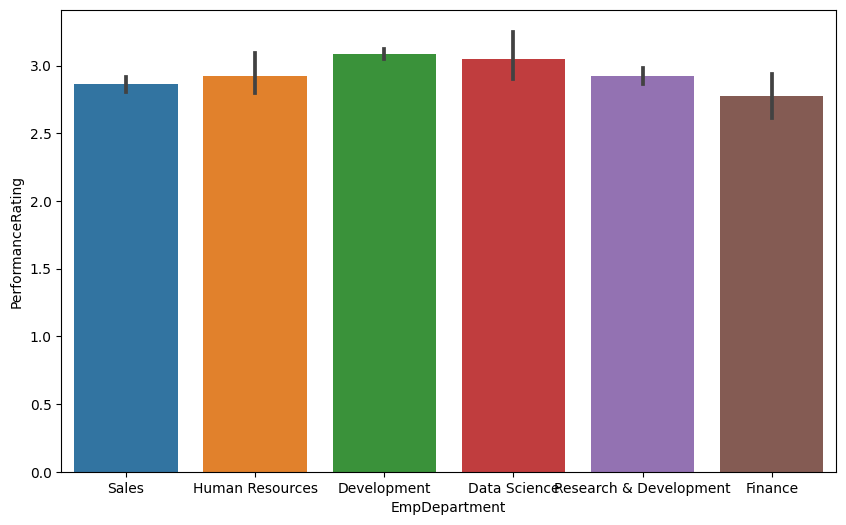

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=dept_per['EmpDepartment'], y = dept_per['PerformanceRating'])
plt.show()

In [ ]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [ ]:
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)
dept_rating

,Data Science,Development,Finance,Human Resources,Research & Development,Sales,PerformanceRating
0,0,0,0,0,0,1,3
1,0,0,0,0,0,1,3
2,0,0,0,0,0,1,4
3,0,0,0,1,0,0,3
4,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...
1195,0,0,0,0,0,1,4
1196,0,1,0,0,0,0,3
1197,0,1,0,0,0,0,3
1198,1,0,0,0,0,0,3


In [ ]:
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
  data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])

data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [ ]:
data.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


In [ ]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


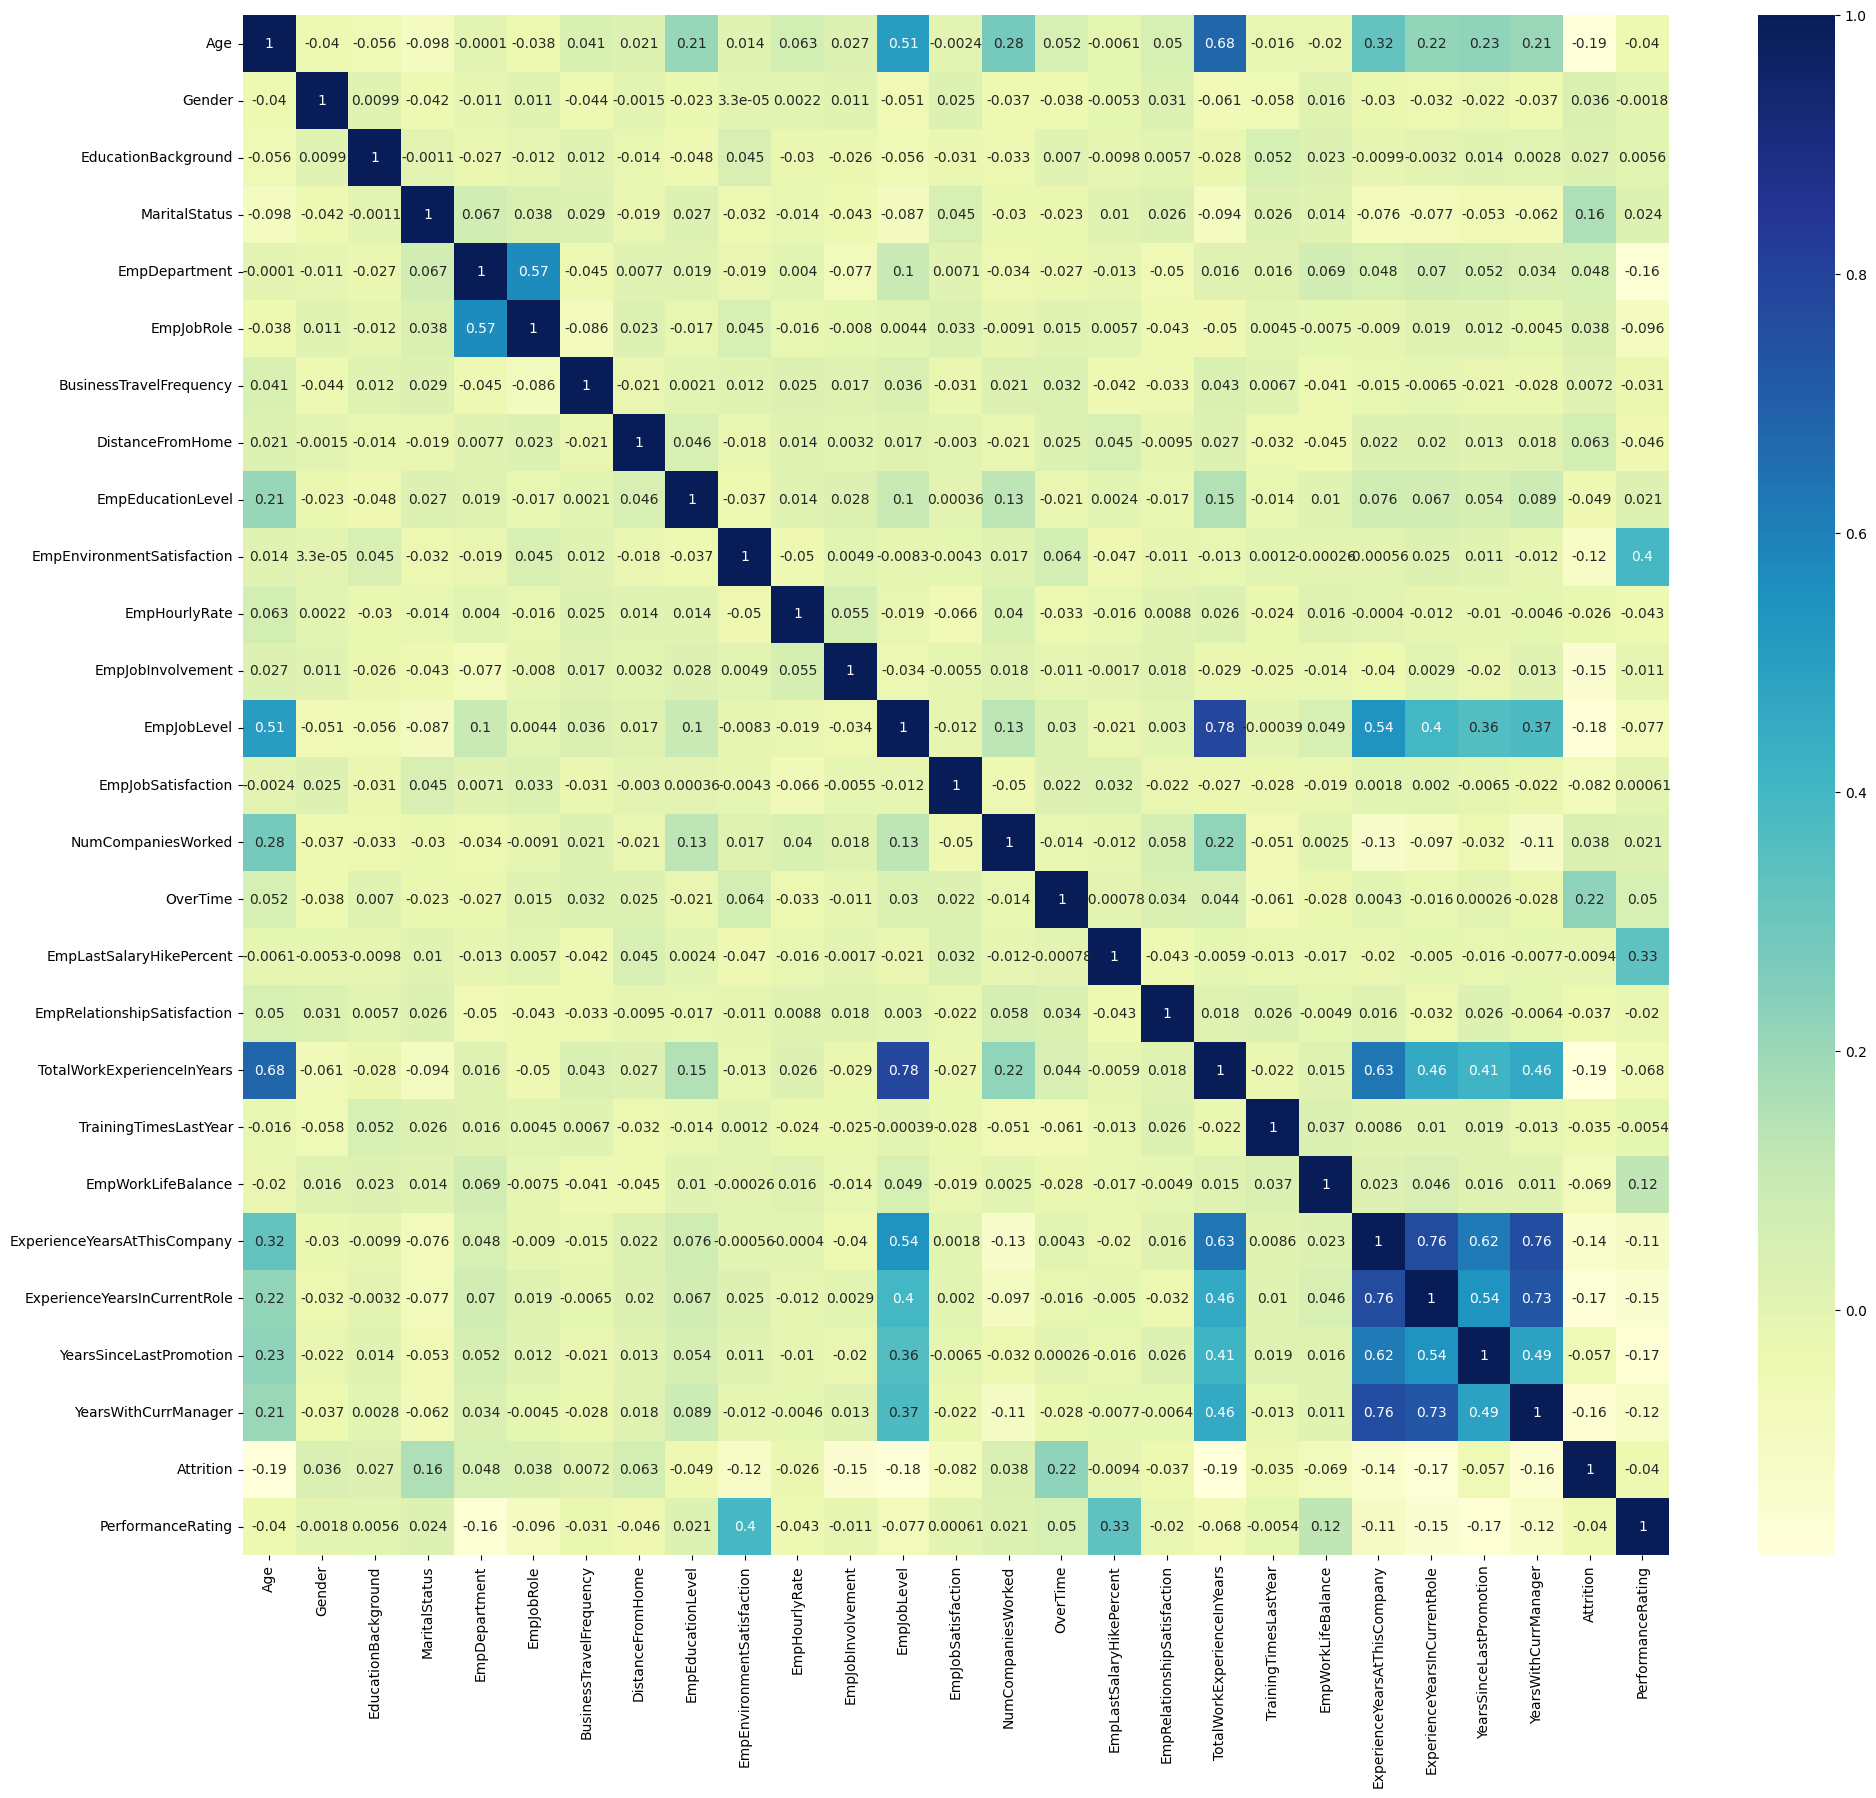

In [ ]:
plt.figure(figsize=(23, 20))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
y=data.PerformanceRating
X=data.iloc[:,1:26]
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,1,2,2,5,13,2,10,3,4,...,0,12,4,10,2,2,10,7,0,8
1,47,1,2,2,5,13,2,14,4,4,...,0,12,4,20,2,3,7,7,1,7
2,40,1,1,1,5,13,1,5,4,4,...,1,21,3,20,2,3,18,13,1,12
3,41,1,0,0,3,8,2,10,4,2,...,0,15,2,23,2,2,21,6,12,6
4,60,1,2,2,5,13,2,16,4,1,...,0,14,4,10,1,3,2,2,2,2


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X = sc.fit_transform(X)

[0.16431594 0.23387316 0.29647714 0.34374541 0.39032124 0.43525676
 0.47870256 0.520232   0.56135793 0.60121837 0.64009444 0.67891119
 0.71698844 0.75407021 0.79000233 0.8258681  0.8604374  0.89292574
 0.92094819 0.94265997 0.96014401 0.97628255 0.98682948 0.99459515
 1.        ]


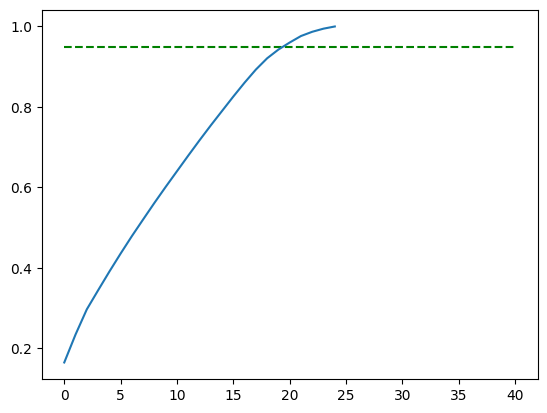

In [ ]:
pca = PCA()
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)
plt.hlines(y=0.95, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)

In [ ]:
pca_final = PCA(0.8)
df_pca = pca_final.fit_transform(X)
df_pca = pd.DataFrame(df_pca)

In [ ]:
df_pca.head

<bound method NDFrame.head of             0         1         2         3         4         5         6   \
0     0.341728 -1.599922 -0.361140  0.184171  0.768680 -0.171980  0.067773   
1     1.281715 -0.133921 -1.274917 -0.700681 -0.097530 -0.685020 -0.046872   
2     3.455909 -0.860471 -1.082153  0.334620  1.028270 -0.451795  0.737239   
3     4.274856  0.479199 -0.068371  1.682898  0.122934  0.249471  0.205626   
4    -0.079171  2.231449 -2.840332  0.608597 -1.859661 -0.836257 -0.188136   
...        ...       ...       ...       ...       ...       ...       ...   
1195 -0.910315 -1.753009 -0.178090  0.063692  1.857967 -0.952911 -0.644866   
1196 -2.541153  0.260005 -0.352205  1.213001  0.198892 -0.360329 -0.703967   
1197  2.114039 -0.518826  1.043168  0.095526  1.853744 -1.896945 -1.207992   
1198  1.176923 -0.066142  2.500862 -1.850067 -0.330562  1.572135  0.123204   
1199 -1.884888 -0.072266 -1.921724 -0.306923 -1.398590  1.280716 -0.854282   

            7         8         9

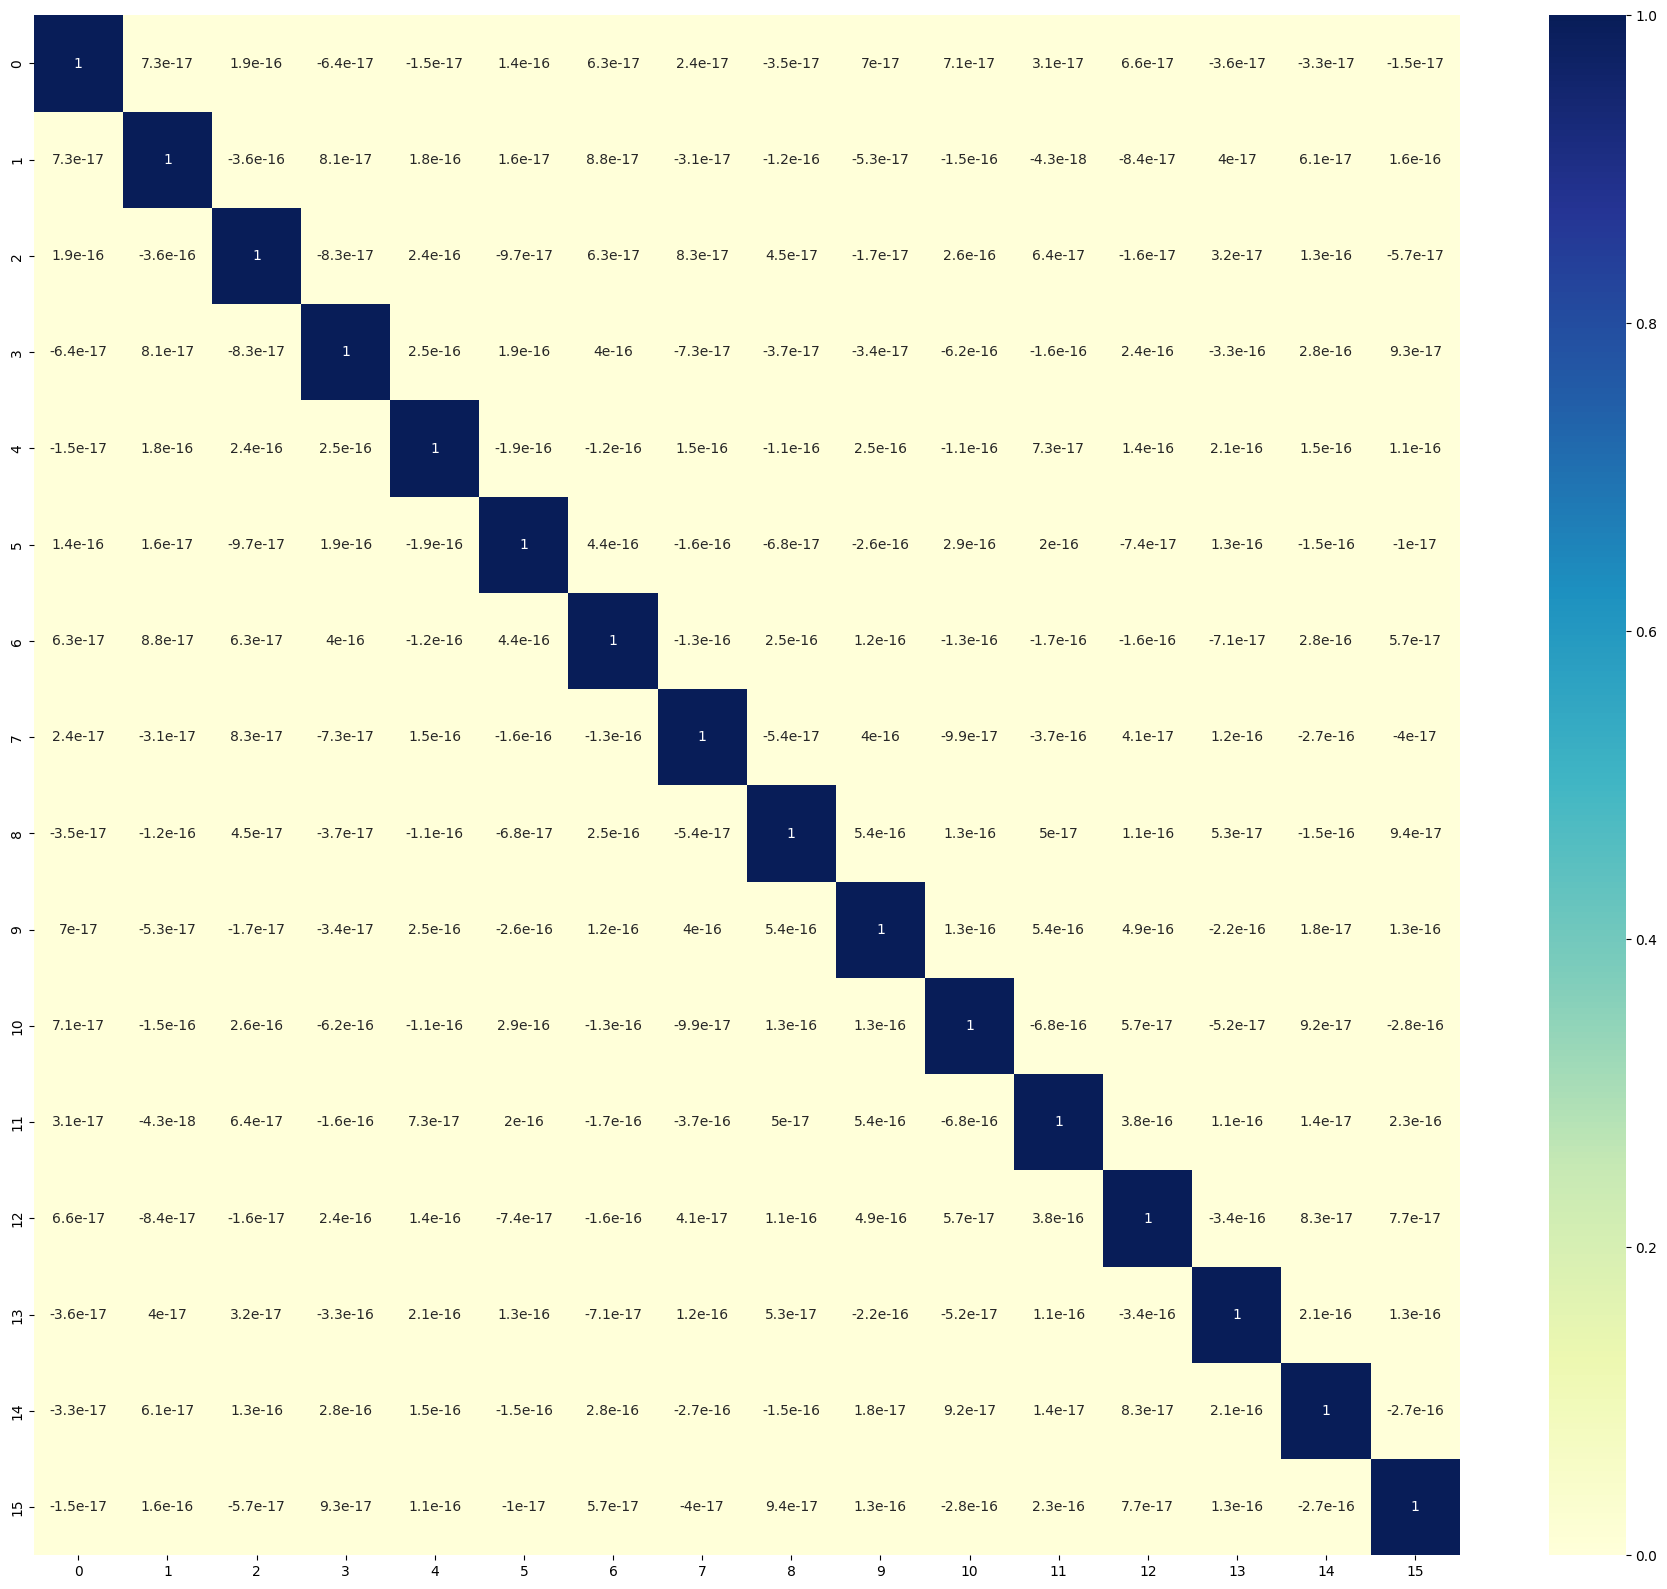

In [ ]:
plt.figure(figsize=(23, 20))
dataplot = sns.heatmap(df_pca.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
X_train_pca,X_test_pca,y_train,y_test = train_test_split(df_pca,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()

In [ ]:
model_logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model_logr.predict(X_test)   #normal pred

In [ ]:
cv = KFold(n_splits=10)

In [ ]:
min_features_to_select = 1
rfecv = RFECV(
    estimator=model_logr,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

In [ ]:
rfecv.fit(X, y)

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), n_jobs=2, scoring='accuracy')

In [ ]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 15


In [ ]:
y_pred_rfecv = rfecv.predict(X_test)  #pred with rfecv

In [ ]:
model_logr.fit(X_train_pca,y_train)

LogisticRegression()

In [ ]:
y_pred_pca = model_logr.predict(X_test_pca)   #pred with pca

In [ ]:
scores = cross_val_score(model_logr, X, y, scoring='accuracy', cv=cv)     #Kfold

In [ ]:
scores = pd.DataFrame(scores)
scores
scores = scores[0].apply(lambda x: float(x))

Logistic in 4 ways

In [ ]:
print("Accuracy score = ",accuracy_score(y_test,y_pred)*100)
print("Accuracy score with PCA = ",accuracy_score(y_test,y_pred_pca)*100)
print("Accuracy score with Recursive Feature Selection = ",accuracy_score(y_test,y_pred_rfecv)*100)
print('Max Accuracy score with k Fold sampling = %.3f' % (scores.max()*100))
# print(classification_report(y_test,y_pred))

Accuracy score =  83.33333333333334
Accuracy score with PCA =  82.08333333333333
Accuracy score with Recursive Feature Selection =  85.0
Max Accuracy score with k Fold sampling = 85.833


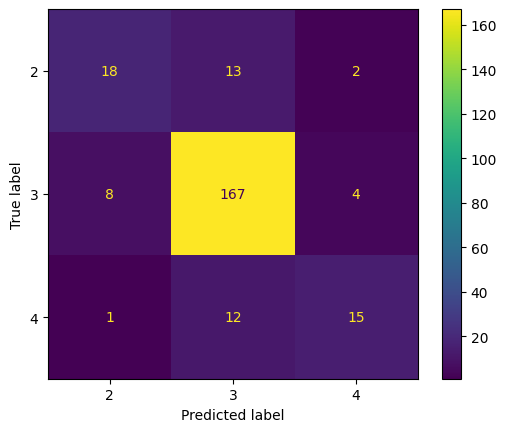

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model_logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_logr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.fit(X_train_pca, y_train)     #gaussian with pca

GaussianNB()

In [ ]:
y_pred_pca = model.predict(X_test_pca)

Gaussian in 2 ways

In [ ]:
print("Accuracy score = ",accuracy_score(y_test,y_pred)*100)
print("Accuracy score with PCA = ",accuracy_score(y_test,y_pred_pca)*100)

Accuracy score =  82.91666666666667
Accuracy score with PCA =  80.83333333333333


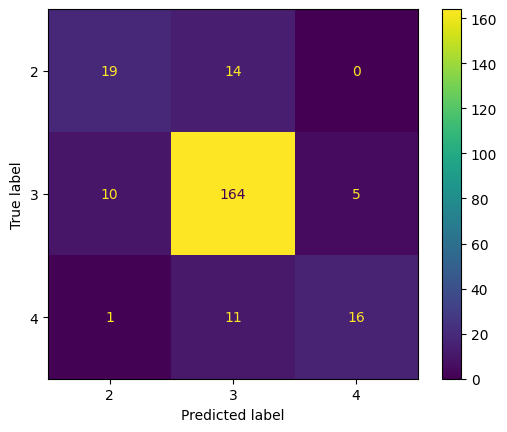

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_pca = model.predict(X_test_pca)

Decision tree in 2 ways

In [ ]:
print("Accuracy score = ",accuracy_score(y_test,y_pred)*100)
print("Accuracy score with PCA = ",accuracy_score(y_test,y_pred_pca)*100)

Accuracy score =  89.58333333333334
Accuracy score with PCA =  80.83333333333333


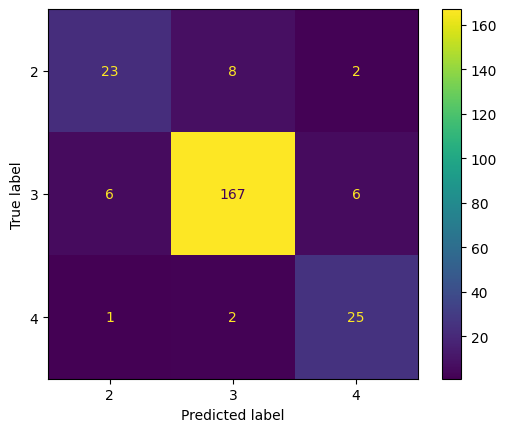

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()